## Метрики качества классификации ч.2


## 2.1
Выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [32]:
from sklearn.metrics import precision_score, f1_score, recall_score

In [33]:
import pandas as pd
import numpy as np
titanic = pd.read_csv('train.csv')
titanic_dataframe = pd.DataFrame(titanic)
male_avg = titanic_dataframe[titanic_dataframe['Sex'] == 'male']['Age'].mean()
female_avg = titanic_dataframe[titanic_dataframe['Sex'] == 'female']['Age'].mean()
titanic_dataframe.loc[titanic_dataframe.Sex == 'male', 'Age'] = titanic_dataframe.loc[titanic_dataframe.Sex == 'male', 'Age'].fillna(male_avg)
titanic_dataframe.loc[titanic_dataframe.Sex == 'female', 'Age'] = titanic_dataframe.loc[titanic_dataframe.Sex == 'female', 'Age'].fillna(female_avg)
titanic_dataframe['Cabin'] = titanic_dataframe['Cabin'].fillna('U')
titanic_dataframe['Embarked'] = titanic_dataframe['Embarked'].fillna('U')
titanic_dataframe.loc[titanic_dataframe.Sex == 'male', 'Sex'] = 0
titanic_dataframe.loc[titanic_dataframe.Sex == 'female', 'Sex'] = 1
titanic_dataframe.loc[titanic_dataframe.Embarked == 'U', 'Embarked'] = 0
titanic_dataframe.loc[titanic_dataframe.Embarked == 'S', 'Embarked'] = 1
titanic_dataframe.loc[titanic_dataframe.Embarked == 'C', 'Embarked'] = 2
titanic_dataframe.loc[titanic_dataframe.Embarked == 'Q', 'Embarked'] = 3
titanic_dataframe = titanic_dataframe.iloc[:, [1,2,4,5,6,7,9,11]]
from sklearn.model_selection import train_test_split 
x = titanic_dataframe.iloc[:, 1:]
y = titanic_dataframe.iloc[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=17)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct_model = dct.fit(x_train, y_train)
dct_pred = dct_model.predict(x_test)
dct_precision = precision_score(y_test, dct_pred, average='micro')
dct_precision

1.0

In [35]:
dct_recall = recall_score(y_test, dct_pred, average='micro')
dct_recall

1.0

In [36]:
f1_metric = (1 + 0.5**2) * ((dct_precision * dct_recall) / (0.5**2 * dct_precision + dct_recall))
f1_metric

1.0

In [37]:
from sklearn.metrics import f1_score
f1_dct = f1_score(y_test, dct_pred, average='micro')
f1_dct

1.0

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [38]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [39]:
dct_support = precision_recall_fscore_support(y_test, dct_pred, average='micro')
dct_support

(1.0, 1.0, 1.0, None)

In [40]:
dct_report = classification_report(y_test, dct_pred, output_dict=True)
dct_report

{'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 54},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 48},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 121},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 223},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 223}}

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [47]:
skf = StratifiedKFold(n_splits=5)

In [43]:
interval = np.logspace(-1, 2, num=500)

In [53]:
lrcv = LogisticRegressionCV(Cs=interval, cv=skf, scoring='roc_auc', random_state=17, multi_class = 'ovr', max_iter = 1000, n_jobs = -1)

In [54]:
lrcv_model = lrcv.fit(x, y)

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [55]:
import matplotlib.pyplot as plt

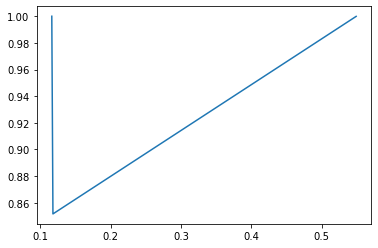

In [88]:
my_roc_auc_score = []
for i in range(1,4):
    score = lrcv_model.scores_[i].mean()
    my_roc_auc_score.append(score)
plt.plot(lrcv_model.C_, my_roc_auc_score)
#plt.axis([-1, 2, 0, 1])
plt.show()

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

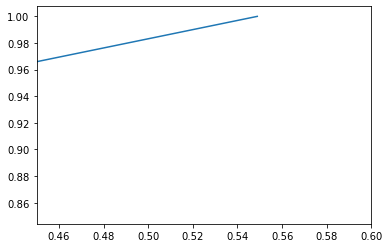

In [89]:
plt.plot(lrcv_model.C_, my_roc_auc_score)
plt.xlim(0.45, 0.6)
plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve

In [96]:
probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

NameError: name 'logit_search' is not defined

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=17, stratify=y)

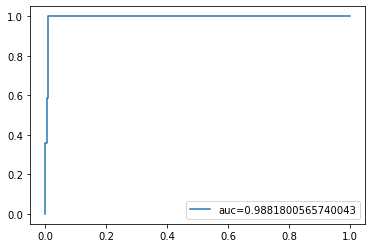

In [118]:
my_probas = lrcv_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, my_probas[:, 0], pos_label=1)
auc = roc_auc_score(y_train, my_probas, multi_class='ovr')
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

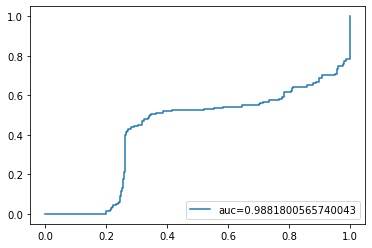

In [119]:
my_probas = lrcv_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, my_probas[:, 1], pos_label=1)
auc = roc_auc_score(y_train, my_probas, multi_class='ovr')
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

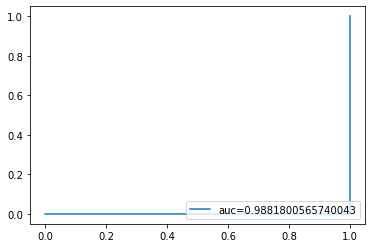

In [120]:
my_probas = lrcv_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, my_probas[:, 2], pos_label=1)
auc = roc_auc_score(y_train, my_probas, multi_class='ovr')
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)